In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pacote para tratamento de datas
from datetime import datetime
from datetime import timedelta

## Objetivo do Estudo:

Direcionar a equipe de marketing na sexta campanha da empresa. Para este estudo foram coletadas informações de usuários da base de forma aleatória, em um total de 2240 anotações.<p>
A campanha piloto custou ao departamento um total de 6.720MU e o retorno foi de 3.674MU, com uma taxa de sucesso de 15%.

O estudo a seguir analisa, de forma pragmática, cada feature da amostra e nos norteia como esta a aceitação do nosso market share. Ao final do estudo culminamos o resultado para a criação de um modelo preditivo de classificação.

## Metadata Table




![title](images/metadata_table.jpg)

In [2]:
arquivo_01 = ('ml_project1_data.csv')

df_inicial = pd.read_csv(arquivo_01, sep = ',')

In [3]:
df_inicial.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [79]:
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null datetime64[ns]
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3        

</p>
O dataset possui valores missing na feature incoming, poderemos seguir a analise sem necessidade de tratamento destes dados. </p>


# EDA - Exploratory Data Analysys

A analise exploratória foi dividida em 3 grandes grupos:

- 01 - Perfil dos Entrevistados:

Analise do perfil do entrevistado, levando em consideração informações pessoais e familiares. Aqui pode-se analisar escolaridade, idade, nucleo familiar, entre outras características.

- 02 - Perfil dos Produtos


- 03 - Meios de Venda
- 04 - Analise das Campanhas

# 01 - Perfil dos Entrevistados

### 01.1 - Year of Birth

In [5]:
df_inicial['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

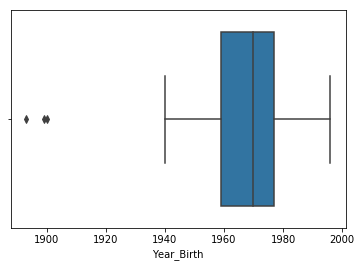

In [6]:
ax = sns.boxplot(x = df_inicial['Year_Birth'])

In [7]:
df_inicial.loc[df_inicial['Year_Birth'] < 1920]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,3,11,0


Detectado acima a existencia de 3 outliers, a informação será mantida no dataset por enquanto e será avaliado se estes dados serão tratados na criação do modelo.

In [8]:
df_inicial['Age'] =  2022 - df_inicial['Year_Birth'] 

In [9]:
df_inicial.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,41


C:\Users\Alexandre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


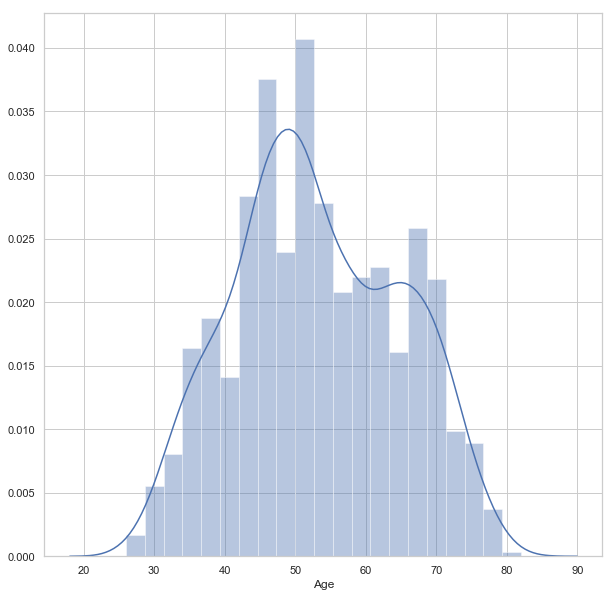

In [10]:
age_clean = df_inicial[df_inicial['Age'] < 100]

# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                        
color = sns.color_palette("Set2", 6)


ax = sns.distplot(age_clean['Age'])

### Criação da feature: Age_cluster

- Cluster 1: grupo de 0 a 40;
- Cluster 2: grupo de 40 a 50;
- Cluster 3: grupo de 50 a 60;
- Cluster 4: grupo de 60 a 70;
- Cluster 5: grupo de 70 +

In [11]:
# create a new column and use np.select to assign values to it using our lists as arguments
df_inicial['Age_cluster'] = np.select(
    (df_inicial['Age'] <= 40,
    (df_inicial['Age'] > 40) & (df_inicial['Age'] <= 50),
    (df_inicial['Age'] > 50) & (df_inicial['Age'] <= 60),
    (df_inicial['Age'] > 60) & (df_inicial['Age'] <= 70),
    (df_inicial['Age'] > 70)),
    ('0-40', '40-50', '50-60', '60-70', '70-+')
    )

# display updated DataFrame
df_inicial.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,65,60-70
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,68,60-70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,57,50-60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,38,0-40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,41,40-50


In [12]:
df_inicial.groupby('Age_cluster').size().sort_values()

Age_cluster
70-+     182
0-40     346
60-70    473
50-60    585
40-50    654
dtype: int64

As idades do grupo estudado estão massivamente entre 40 e 60 anos, conforme acima

### 01.2 - Education

In [13]:
df_inicial['Education'].describe()

count           2240
unique             5
top       Graduation
freq            1127
Name: Education, dtype: object

In [14]:
education = df_inicial.groupby('Education').agg({'Education' : 'count'}).rename(
                        columns = {'Education' : 'Count'}).sort_values('Count',ascending=False)

education['Rate'] = education['Count'] / education['Count'].sum()
education['Cumulative'] = education['Rate'].cumsum()
education.round(decimals = 2)

,Count,Rate,Cumulative
Education,,,
Graduation,1127,0.50,0.50
PhD,486,0.22,0.72
Master,370,0.17,0.89
2n Cycle,203,0.09,0.98
Basic,54,0.02,1.00


### 01.3 - Marital_Status

In [15]:
mstats = df_inicial.groupby('Marital_Status').agg({'Marital_Status' : 'count'}).rename(
                        columns = {'Marital_Status' : 'Count'}).sort_values('Count',ascending=False)

mstats['Rate'] = mstats['Count'] / mstats['Count'].sum()
mstats['Cumulative'] = mstats['Rate'].cumsum() 
mstats.round(decimals = 2)

,Count,Rate,Cumulative
Marital_Status,,,
Married,864,0.39,0.39
Together,580,0.26,0.64
Single,480,0.21,0.86
Divorced,232,0.10,0.96
Widow,77,0.03,1.00
Alone,3,0.00,1.00
Absurd,2,0.00,1.00
YOLO,2,0.00,1.00


### Criação da feature: Status_cluster

- Cluster 1: married, together;
- Cluster 2: single, divorced, widow, alone;
- Cluster 3: others;

### 01.4 - Income

In [16]:
df_inicial['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

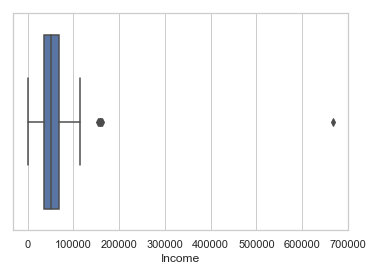

In [17]:
ax = sns.boxplot(x = df_inicial['Income'])

In [18]:
df_inicial.loc[df_inicial['Income'] > 100000].sort_values('Income', ascending = False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_cluster
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,3,11,0,45,40-50
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,0,3,11,0,46,40-50
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,3,11,0,40,0-40
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,0,3,11,0,51,50-60
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,3,11,0,49,40-50
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,0,0,0,0,3,11,0,45,40-50
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,3,11,0,73,70-+
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,3,11,0,47,40-50
1898,4619,1945,PhD,Single,113734.0,0,0,2014-05-28,9,6,...,0,0,0,0,0,3,11,0,77,70-+
646,4611,1970,Graduation,Together,105471.0,0,0,2013-01-21,36,1009,...,0,1,1,0,0,3,11,1,52,50-60


C:\Users\Alexandre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


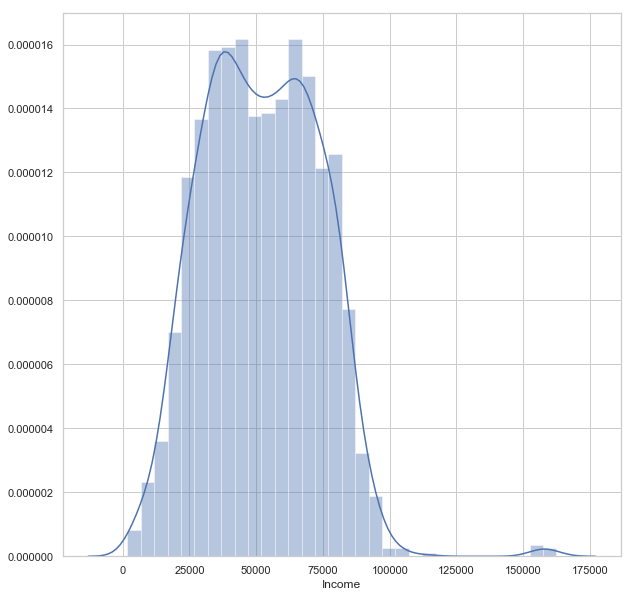

In [19]:
income_clean =  df_inicial[df_inicial['Income'] < 200000]

# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.distplot(income_clean['Income'])

Quanto da renda estes consumidores estão comprometendo com a companhia?

In [20]:
df_income = income_clean.iloc[:,9:14]
df_income['Income'] = df_inicial['Income'] 

df_income['return'] = (df_income.iloc[:,0:5].sum(axis = 1))/ 2
df_income['rate'] = (df_income['return'] / df_income['Income']) * 100

df_income.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Income,return,rate
0,635,88,546,172,88,58138.0,764.5,1.314975
1,11,1,6,2,1,46344.0,10.5,0.022657
2,426,49,127,111,21,71613.0,367.0,0.512477
3,11,4,20,10,3,26646.0,24.0,0.090070
4,173,43,118,46,27,58293.0,203.5,0.349099


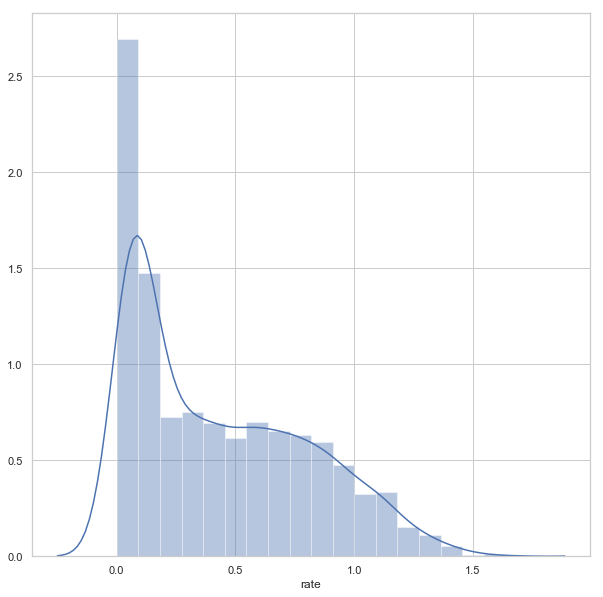

In [21]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)

teste = df_income[df_income['rate'] < 5]

ax = sns.distplot(teste['rate'])

In [22]:
df_income[df_income['rate'] > 5]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Income,return,rate
21,1,1,1725,1,1,2447.0,864.5,35.328974


### 01.5 - Kidhome

In [23]:
df_inicial['Kidhome'].describe()

count    2240.000000
mean        0.444196
std         0.538398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64

In [24]:
kids = df_inicial.groupby('Kidhome').agg({'Kidhome' : 'count'}).rename(
                        columns = {'Kidhome' : 'Count'}).sort_values('Count',ascending=False).reset_index()

kids['Rate'] = kids['Count'] / kids['Count'].sum()
kids.round(decimals = 2)

,Kidhome,Count,Rate
0,0,1293,0.58
1,1,899,0.40
2,2,48,0.02


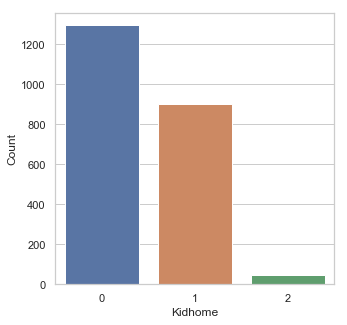

In [25]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(5, 5)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.barplot(kids['Kidhome'], kids['Count'])

### 01.6 - Teenhome

In [26]:
df_inicial['Teenhome'].describe()

count    2240.000000
mean        0.506250
std         0.544538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Teenhome, dtype: float64

In [27]:
teen = df_inicial.groupby('Teenhome').agg({'Teenhome' : 'count'}).rename(
                        columns = {'Teenhome' : 'Count'}).sort_values('Count',ascending=False).reset_index()

teen['Rate'] = teen['Count'] / teen['Count'].sum()
teen.round(decimals = 2)

,Teenhome,Count,Rate
0,0,1158,0.52
1,1,1030,0.46
2,2,52,0.02


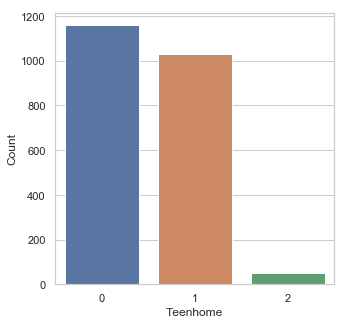

In [28]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(5, 5)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.barplot(teen['Teenhome'], teen['Count'])

### 01.7 - Dt_Customer
date of consumer's enrollment with the company

In [29]:
df_inicial['Dt_Customer'].describe()

count           2240
unique           663
top       2012-08-31
freq              12
Name: Dt_Customer, dtype: object

In [30]:
df_inicial['Dt_Customer'] = pd.to_datetime(df_inicial['Dt_Customer'], format = '%Y-%m-%d')

In [31]:
df_inicial['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

In [32]:
df_inicial['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [33]:
today = datetime.now()
year = timedelta(days=365)

df_inicial['Years_on_plataform'] = ((today - df_inicial['Dt_Customer']) / year).round(2)

In [34]:
df_inicial.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_cluster,Years_on_plataform
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,65,60-70,9.42
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,68,60-70,7.91
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,57,50-60,8.46
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,38,0-40,7.98
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,41,40-50,8.05


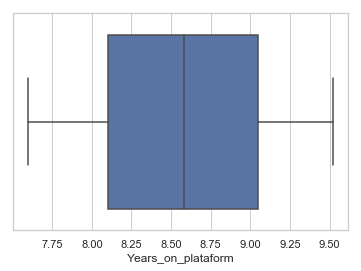

In [35]:
ax = sns.boxplot(x = df_inicial['Years_on_plataform'])

C:\Users\Alexandre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


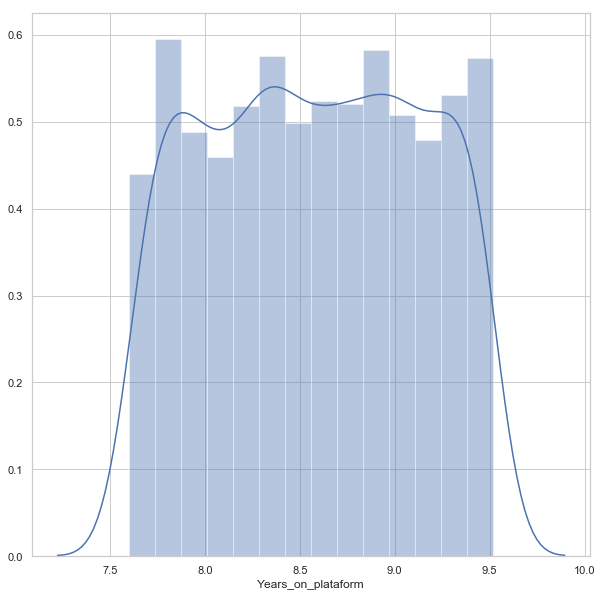

In [36]:
income_clean =  df_inicial[df_inicial['Income'] < 200000]

# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.distplot(df_inicial['Years_on_plataform'])

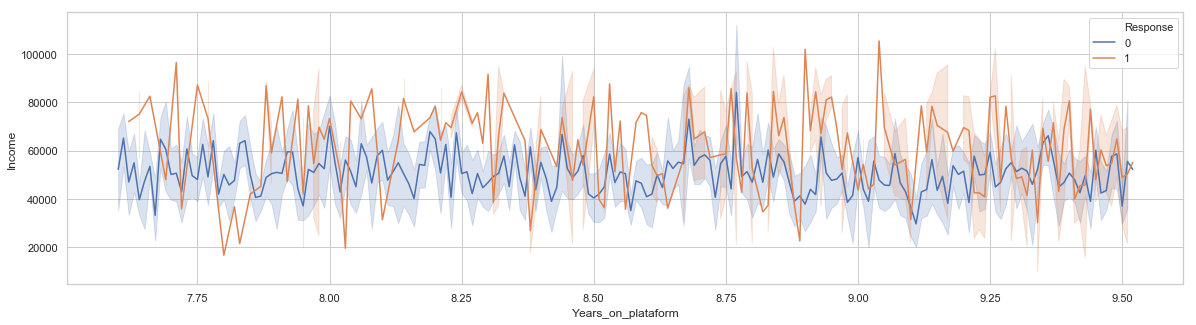

In [69]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(20, 5)) # Two column paper. Each column is about 3.15 inch wide.     


sns.lineplot(data=df_inicial[df_inicial['Income'] < 200000], 
    x="Years_on_plataform", y="Income", hue = 'Response')

C:\Users\Alexandre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


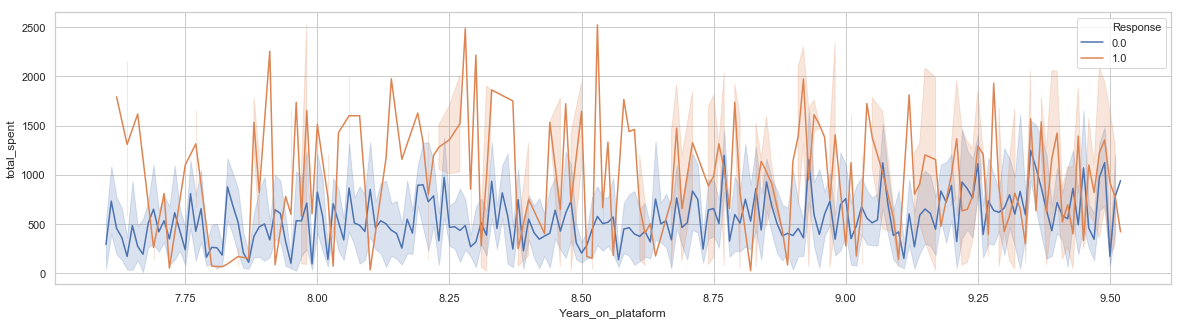

In [83]:
df_inicial['total_spent'] = df_inicial['MntWines'] + df_inicial['MntFruits'] + df_inicial['MntMeatProducts'] + df_inicial['MntFishProducts'] + df_inicial['MntSweetProducts'] + df_inicial['MntGoldProds']  

sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(20, 5)) # Two column paper. Each column is about 3.15 inch wide.     


sns.lineplot(data=df_inicial[df_inicial['Income'] < 200000], 
    x="Years_on_plataform", y=df_inicial['total_spent'] 
             , hue = 'Response')

In [77]:
teste = df_inicial.iloc[:,9:15].sum()
teste

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

In [ ]:
Acima podemos ver que a progressão de tempo de plataforma não afeta o modo 

### 01.8 - Recency

In [38]:
df_inicial['Recency'].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

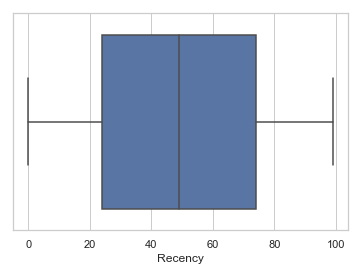

In [39]:
ax = sns.boxplot(x = df_inicial['Recency'])

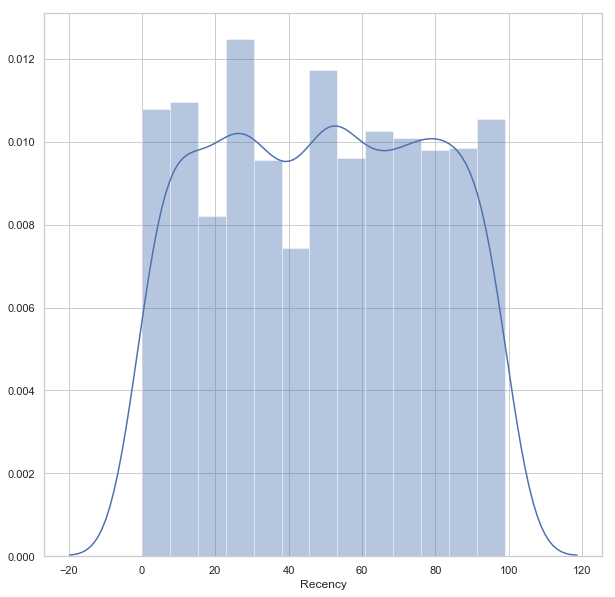

In [40]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.distplot(df_inicial['Recency'])

## Resumo do Grupo de Controle

# 02 - Perfil dos Produtos

In [41]:
df_products = df_inicial.iloc[:,9:15]
df_products.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


In [42]:
total_amount_products = df_products.sum()
total_amount_products

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

In [43]:
total_purchases_products = (df_products != 0).sum()
total_purchases_products

MntWines            2227
MntFruits           1840
MntMeatProducts     2239
MntFishProducts     1856
MntSweetProducts    1821
MntGoldProds        2179
dtype: int64

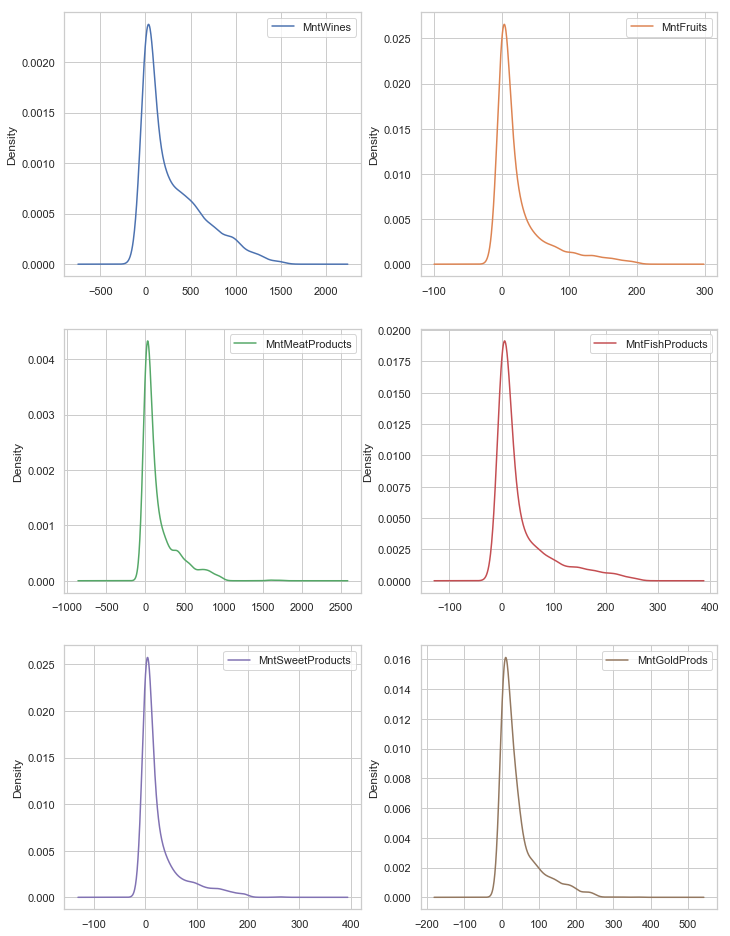

In [44]:
# Density Plots
df_products.plot(kind = 'density',layout = (3,2), subplots = True,  sharex = False, figsize = (11.7, 16.5))
plt.show()

In [45]:
df_produdcts_reshape = pd.DataFrame((total_purchases_products, total_amount_products)).T
df_produdcts_reshape = df_produdcts_reshape.rename(columns = {0 : 'Tickets', 1 : 'Total_spent_2y'})

df_produdcts_reshape['Total_spent_1y'] = df_produdcts_reshape['Total_spent_2y'] / 2
df_produdcts_reshape['Ticket_mean'] = (df_produdcts_reshape['Total_spent_2y'] / df_produdcts_reshape['Tickets']).round(2)

df_produdcts_reshape.sort_values('Total_spent_2y', ascending = False)

,Tickets,Total_spent_2y,Total_spent_1y,Ticket_mean
MntWines,2227,680816,340408.0,305.71
MntMeatProducts,2239,373968,186984.0,167.02
MntGoldProds,2179,98609,49304.5,45.25
MntFishProducts,1856,84057,42028.5,45.29
MntSweetProducts,1821,60621,30310.5,33.29
MntFruits,1840,58917,29458.5,32.02


# 03 - Perfil dos Meios de Venda

### 03.1 - NumDealsPurchases
number of purchases made with discount

In [46]:
df_inicial['NumDealsPurchases'].describe()

count    2240.000000
mean        2.325000
std         1.932238
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64

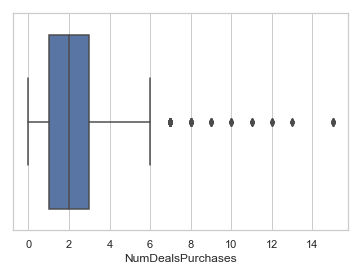

In [47]:
ax = sns.boxplot(x = df_inicial['NumDealsPurchases'])

C:\Users\Alexandre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


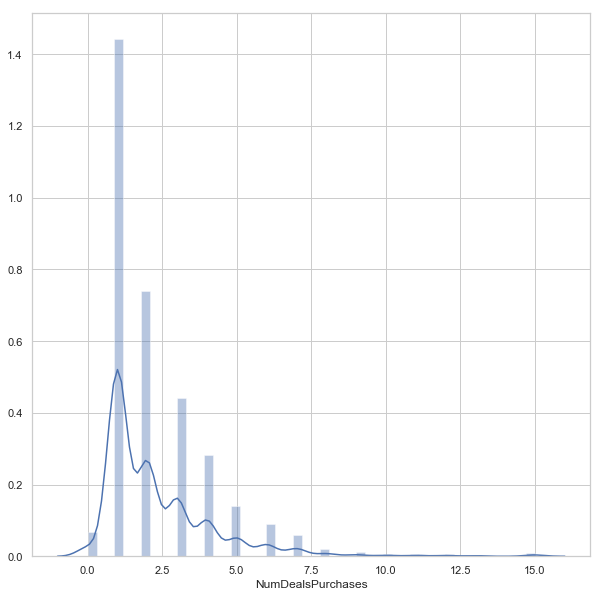

In [48]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.distplot(df_inicial['NumDealsPurchases'])

### 03.2.1 - NumWebPurchases
number of purchases made trough web

In [49]:
df_inicial['NumWebPurchases'].describe()

count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

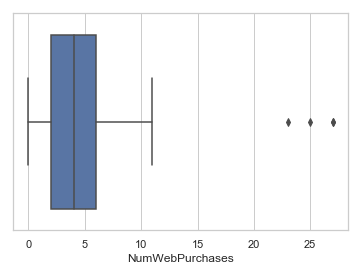

In [50]:
ax = sns.boxplot(x = df_inicial['NumWebPurchases'])

### 03.2.1 - NumWebVisitsMonth
number of visits to website in the last month

In [51]:
df_inicial['NumWebVisitsMonth'].describe()

count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

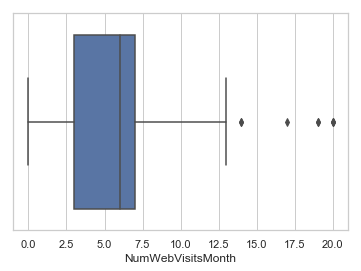

In [52]:
ax = sns.boxplot(x = df_inicial['NumWebVisitsMonth'])

### 03.3 - NumCatalogPurchases
number of purchases made trough catalog

In [53]:
df_inicial['NumCatalogPurchases'].describe()

count    2240.000000
mean        2.662054
std         2.923101
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64

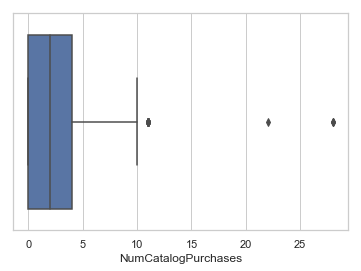

In [54]:
ax = sns.boxplot(x = df_inicial['NumCatalogPurchases'])

### 03.4 - NumStorePurchases
number of purchases made trough store

In [55]:
df_inicial['NumStorePurchases'].describe()

count    2240.000000
mean        5.790179
std         3.250958
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64

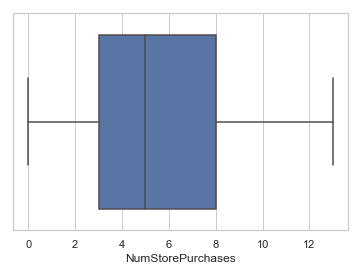

In [56]:
ax = sns.boxplot(x = df_inicial['NumStorePurchases'])

In [57]:
df_inicial['Z_CostContact'].describe()

count    2240.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Z_CostContact, dtype: float64

In [58]:
df_inicial['Z_CostContact'].nunique()

1

In [59]:
df_inicial['Z_Revenue'].nunique()

1

# 04 - Analise das Campanhas

In [60]:
campagnes = pd.concat((df_inicial.iloc[:,20:26], df_inicial['Response'],df_inicial['NumDealsPurchases'] ), axis = 1)
campagnes.head()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumDealsPurchases
0,0,0,0,0,0,0,1,3
1,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,5


In [61]:
campagnes_list = list(campagnes.columns)
campagnes_hist = []

for n in campagnes_list:
    x = (len(df_inicial[df_inicial[n] != 0]))
    campagnes_hist.append(x)

campagnes_hist = pd.DataFrame(campagnes_hist, index = campagnes_list, columns = ['Obs'])



campagnes_hist['rate'] = ((campagnes_hist['Obs'] / len(df_inicial)) * 100).round(2)

campagnes_hist

,Obs,rate
AcceptedCmp3,163,7.28
AcceptedCmp4,167,7.46
AcceptedCmp5,163,7.28
AcceptedCmp1,144,6.43
AcceptedCmp2,30,1.34
Complain,21,0.94
Response,334,14.91
NumDealsPurchases,2194,97.95


# Analise Exploratória de Consumidores de Vinho

In [62]:
df_wine = df_inicial[df_inicial['MntWines'] != 0]

In [63]:
df_wine['ID'].size

2227

In [64]:
df_wine_grouped = df_wine.groupby('Education').agg({'MntWines' : 'sum', 'ID' : 'count', 'Age' : 'mean', 'Response' : 'sum', 'AcceptedCmp5' : 'sum', 'AcceptedCmp4' : 'sum'}).sort_values(by = 'MntWines', ascending = False)
#df_wine_grouped['wine_spent'] = df_wine_grouped
df_wine_grouped

,MntWines,ID,Age,Response,AcceptedCmp5,AcceptedCmp4
Education,,,,,,
Graduation,320371,1124,52.354093,152,86,81
PhD,196585,486,55.956790,101,39,45
Master,123238,370,55.121622,57,28,31
2n Cycle,40231,199,50.055276,22,10,10
Basic,391,48,45.270833,2,0,0


In [65]:
df_wine_grouped['Response'].sum()

334

In [66]:
agreggations = {'ID' : 'count',
                'Years_on_plataform' : 'mean',
                'Income' : 'mean',
                'MntWines' : 'sum', 
                'NumDealsPurchases' : 'mean',
                'NumWebPurchases' : 'mean',
                'NumCatalogPurchases' : 'mean',
                'NumStorePurchases' : 'mean',
                'NumWebVisitsMonth' : 'mean',
                'Complain' : 'sum',
                #'AcceptedCmp1' : 'sum',
                #'AcceptedCmp2' : 'sum',
                #'AcceptedCmp3' : 'sum',
                'AcceptedCmp4' : 'sum',
                'Response' : 'sum',
                'Recency' : 'mean'}


df_wine_grouped = df_wine.groupby(['Education', 'Age_cluster', 'Marital_Status']).agg(agreggations).sort_values(by = 'MntWines', ascending = False).reset_index()

df_wine_grouped['wine_repr'] = ((df_wine_grouped['MntWines'] / df_wine_grouped['MntWines'].sum()).round(2)).cumsum()
df_wine_grouped['renda_vinho'] =  df_wine_grouped['MntWines'] / (df_wine_grouped['Income'] / 2)


(df_wine_grouped.head(11)).round(2)

,Education,Age_cluster,Marital_Status,ID,Years_on_plataform,Income,MntWines,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmp4,Response,Recency,wine_repr,renda_vinho
0,Graduation,40-50,Married,149,8.64,47188.97,34412,2.91,4.01,2.25,5.47,5.95,2,6,13,47.70,0.05,1.46
1,Graduation,50-60,Married,100,8.48,53468.14,29002,2.31,4.50,2.55,6.07,5.30,1,9,10,49.27,0.09,1.08
2,Graduation,60-70,Married,84,8.61,56471.83,27668,2.35,4.49,3.15,6.32,4.89,3,10,6,54.24,0.13,0.98
3,Graduation,60-70,Together,74,8.65,54905.51,27534,2.64,4.18,2.99,6.50,4.82,2,8,9,49.78,0.17,1.00
4,PhD,50-60,Married,60,8.59,56073.80,25725,3.00,4.63,3.23,6.75,5.82,0,5,12,49.97,0.21,0.92
5,Graduation,50-60,Together,74,8.60,54795.24,24870,2.47,4.34,2.69,5.72,5.23,0,6,8,52.47,0.25,0.91
6,Graduation,40-50,Together,77,8.56,63356.62,22004,2.16,4.56,2.96,6.03,5.12,1,5,4,52.25,0.28,0.69
7,Graduation,50-60,Single,69,8.61,50116.66,19316,2.55,3.75,2.49,5.51,5.57,0,7,10,50.48,0.31,0.77
8,Graduation,60-70,Single,48,8.65,60019.00,18728,2.38,5.04,3.90,6.25,5.17,1,4,17,49.23,0.34,0.62
9,PhD,40-50,Married,53,8.63,55810.25,18621,2.38,4.21,3.00,5.81,5.13,0,7,8,49.53,0.37,0.67


## Clustering os Clientes com KNN